<img src="logo_UNSAM.jpg" align="right" width="120">


# <center>Trabajo final: *Detección de oscilaciones de la frecuencia cardíaca postictales en epilepsia parcial*</center> 

### <center> - Alumna: Lola Pampin</center> 

### <center> - Profesor: Mariano Llamedo Soria</center> 

### <center>Febrero 2026</center> 

## <center> Universidad Nacional de San Martín, Escuela de Ciencia y Tecnología</center> 




# Resumen
En el presente informe se analiza la presencia de oscilaciones de la frecuencia cardíaca durante el período postictal en el contexto de la epilepsia parcial. El estudio se enmarca en el Trabajo Final de la materia Análisis y Procesamiento de Señales y busca replicar, a escala reducida, los resultados reportados por Al‑Aweel et al. (1999). En dicha investigación se describen oscilaciones postictales transitorias y prominentes de baja frecuencia (0,01–0,1 Hz), asociadas a convulsiones, las cuales podrían constituir un indicador de inestabilidad neuroautonómica. 

La base de datos consultada se encuentra disponible en el siguiente enlace https://physionet.org/content/szdb/1.0.0/


**Palabras clave**: Epilepsia — Variabilidad de la frecuencia cardíaca 

# **I. Introducción**
## <u>**Marco clinico**</u>
## *Epilepsia*
La epilepsia es un trastorno neurológico crónico caracterizado por la aparición recurrente de crisis, producto de una actividad neuronal anormal, excesiva o sincrónica en el cerebro. Estas crisis pueden generar consecuencias negativas tanto a corto como a largo plazo, incluyendo caídas, traumatismos, mortalidad prematura, trastornos psiquiátricos, déficits cognitivos y dificultades en el ámbito social, laboral y académico.

<u> *Clasificación de epilepsia*</u>

La epilepsia se puede clasificar según el tipo de convulsión. Según la Liga Internacional contra la Epilepsia las convulsiones se clasifican según donde se originan en el cerebro. A partir de este parámetro las convulsiones pueden ser:
- <u>Generalizadas</u>: se originan simultáneamente en ambos hemisferios (inicio generalizado).
- <u>Parciales</u>: son aquellas que poseen un inicio focal, es decir en una sola zona del cerebro. Este tipo de convulsión se divide a su vez en simples (afectan una pequeña porción del cerebro)  o complejas (comienzan en un área y se propagan a otra). 
La principal diferencia entre una convulsión parcial simple y una convulsión parcial compleja es la alteración de la consciencia y un período postictal en esta última, que también se presenta en una convulsión generalizada. Es decir, las convulsiones parciales complejas y las generalizadas pueden presentarse de forma similar, pero difieren en que en las parciales la convulsión se propaga de un área focal a otra (no se presenta en ambos hemisferios al mismo tiempo).
### *Ritmo cardíaco*
La medición del ritmo cardíaco constituye una herramienta fundamental en el monitoreo de la salud, ya que permite detectar alteraciones en la actividad cardiovascular y evaluar el estado físico de una persona. 

Específicamente, la frecuencia cardiaca es el número de veces que se contrae el corazón durante un minuto. Desde el punto de vista teórico, el cálculo del ritmo cardíaco se realiza midiendo el intervalo entre latidos consecutivos, denominado intervalo RR. 
El ritmo cardíaco se puede obtener a través de este intervalo, como se muestra en la ecuación 1 y 2. 

$$
Intervalo RR [s] =Intervalo RR[muestras] \times \frac {1}{fs}          (1)
$$

Finalmente, a partir de dicho valor, se calcula el ritmo cardíaco en pulsaciones por minuto (BPM) como:

$$
BPM = \frac{60}{Intervalo RR en segundos}               (2)
$$


### *Electrocardiograma*
El electrocardiograma (ECG) es un estudio que mide las señales eléctricas del corazón durante cada latido. Su análisis permite identificar patologías, alteraciones del ritmo cardíaco y variaciones en la conducción eléctrica. Los principales componentes de un latido son:
- *<u>Onda P</u>*: representa la despolarización auricular (las cavidades superiores del corazón se activan eléctricamente). Es de baja amplitud (0.1-0.2 mV) y relativamente lenta.
- *<u>Complejo QRS</u>*: corresponde a la despolarización ventricular (activación eléctrica de los ventrículos, las cavidades encargadas de bombear sangre al cuerpo). Es el componente de mayor energía y rapidez en el ECG. Su pendiente pronunciada requiere preservar componentes de frecuencia relativamente altas.
- *<u>Onda T </u>*: asociada a la repolarización ventricular (luego de activarse, las células vuelven a su voltaje "de reposo"). Es más ancha que la onda P y su contenido espectral es de menor frecuencia que el QRS.


## <u>**Materiales y métodos**</u>

### *Transformada Discreta de Fourier*

La medición, estimación y caracterización del contenido frecuencial de una señal se realiza mediante el *análisis espectral*. Para este propósito se utiliza la Transformada Discreta de Fourier (DFT), que constituye una transformación lineal que asocia a cada muestra temporal x[n] un coeficiente complejo X[k], representando la contribución de cada frecuencia en la señal.
En aplicaciones prácticas, donde las señales son digitales y de duración finita, el análisis espectral se implementa mediante versiones computacionales de la DFT, que permiten obtener estimaciones del espectro a partir de datos discretos.
En este trabajo se emplea específicamente la Transformada Rápida de Fourier (FFT), que es un algoritmo eficiente para calcular la DFT. La FFT reduce significativamente el costo computacional al explotar las propiedades de simetría y periodicidad de la transformada, implementando un enfoque tipo divide y vencerás. Esto la convierte en la herramienta estándar para el análisis espectral en procesamiento digital de señales.

Para comprender la FFT es oportuno expresar la DFT para cualquier punto N:

$$
X[k]=\sum_{n=0}^{N-1}x[n]e^{(-j2 \pi kn/N)})=\sum_{n=0}^{N-1}x[n]W_n^{kn}
$$

El objetivo de la FFT es realizar la transformación más rápido. Para ello, una de las aplicaciones utilizadas es el *DIT FFT* (decimation-in-time). En este método, la secuencia de entrada x[n] es separada en 2 subsecuencias de N/2 puntos, $x_1[n]$ representa los valores pares de la entrada, y $x_2[n]$ los impares. Por lo tanto, la DFT queda representada como:

$$
X[k]=\sum_{n=0}^{N/2-1}x[2n]W_n^{k2n}+\sum_{n=0}^{N/2-1}x[2n+1]W_n^{k(2n+1)}= \sum_{n=0}^{N/2-1}x_1[n]W_n^{k2n}+\sum_{n=0}^{N/2-1}x_2[n]W_n^{k(2n+1)}
$$

Ademas, $W_N^{k2n}=e^{-j2\pi k(2n)/N}=e^{-j2\pi kn/(N/2)}=W_{N/2}^{kn}$ y $W_N^{k(2n+1)}= e^{-j2 \pi k(2n+1)/N}=e^{-j2 \pi k2n/N}e^{-j2 \pi k/N}=W_{N/2}^{kn}W_{N}^{kn}$

Por lo tanto,

$$
X[k]=\sum_{n=0}^{N/2-1}x_1[n]W_{N/2}^{kn}+W_N^k\sum_{n=0}^{N/2-1}x_2[n]W_{N/2}^{kn}=X_1[k]+W_N^kX_2[k],   0 \leq k=N
$$

Resulta interesante remarcar que cada factor $W_N^k$ es denominado *twiddle factor*, debido a que el efecto de multiplicar a $X_2[k]$ por $W_N^k=e^{-j2 \pi k/N}$ es cambiar la fase $2 \pi k/N$ antes de sumar el resultado a $X_1[k]$

A este punto se recurre a la periodicidad de la DFT, que tiene un periodo de N/2, por lo tanto solo se computan los primeros N/2 valores de $X_1[k]$ y $X_2[k]$.

$$
X_1[k+N/2]=X_1[k]
$$

$$
X_2[k+N/2]=X_2[k]
$$

$$
0\leq k<N/2
$$
Por lo tanto, cada valor de $X_1[k]$ y $X_2[k]$ es utilizado dos veces, una para computar X[k] y otra para X[k+N/2], esto da origen al llamado “gráfico de mariposa” que está relacionado con la FFT. Utilizando las propiedades de simetría de la DFT se logra agilizar el algoritmo, logrando calcular la transformada en un número mucho menor de pasos y obteniendo una complejidad O(N log N), ampliamente menor a la de la DFT que es $N^2$.

### Método de Welch

El método de Welch es una técnica para estimar la densidad espectral de potencia (PSD) de una señal. Consiste en dividir la señal en segmentos parcialmente solapados, calcular el periodograma de cada segmento y luego promediarlos. Para disminuir la fuga espectral, cada segmento se multiplica previamente por una ventana.
El método de Welch se utiliza ampliamente en el análisis de señales fisiológicas, ya que proporciona una estimación estable del contenido espectral en bandas de interés.
Es equivalente a hacer el periodograma modificado promediado, pero se divide la secuencia de datos x[n] en M tramos de longitud L que se solapan en D puntos. En cada tramo, los datos se multiplican por una ventana y se calculan y promedian los periodogramas para formar el de Welch. Es decir, se basa en el método de Bartlett, pero los bloques se encuentran solapados y agrega ventaneo. Busca concentrar mejor la energía y evitar el desparramo espectral. Su definición matemática es:

$$ P_W(\omega, L, D, M) =  \frac{     \frac{1}{M} \sum_{m=0}^{M-1}      \left( \sum_{n=0}^{L-1} x[n + mD] w_L[n] e^{-j\omega n} \right)^2 }{     \sum_{n=0}^{L-1} w_L^2[n] } $$

Este método logra un estimador insesgado y consistente para la PDS, ya que combina el periodograma, el método de Bartlett y el periodograma modificado.




# **II. Desarrollo**
Para el desarrollo del presente trabajo se utilizaron los registros de electrocardiograma (ECG) correspondientes a 7 pacientes. Se muestra únicamente el análisis realizado sobre el registro identificado como número 1 en la base de datos analizada. 

En primer lugar, se procedió a la lectura de los archivos y a la detección de los latidos cardíacos mediante el código que se presenta a continuación. Adicionalmente, se graficaron los registros de ECG filtrado junto con las detecciones de los latidos, con el objetivo de visualizar el procedimiento realizado.

In [13]:
# %% LIBRERIAS


import matplotlib.pyplot as plt
from os import listdir
from scipy.signal import welch, windows, sosfiltfilt, iirnotch, butter, filtfilt, find_peaks
from numpy.fft import fft
from scipy.interpolate import interp1d
import math
import numpy as np


# %% Variables globales

FS=200 #Hz --> establecida en paper 
F_QRS=[5,15] # [Hz] rango de frecuencia complejo QRS

FS_hr = 4.0  # Hz frecuencia para muestreo uniforme de HR para aplicacion de la FFT

## Frecuencia cardiaca minima y maxima (umbral fisiologico) ##
MIN_HR=30 #latidos/min
MAX_HR=220

RR_MIN = 0.3 #[s]  (200 bpm)
rr_max = 2#[s]  (30 bpm)

PRE_ICT1 = 14
POS_ICT1= 16


"""
####Tiempos de episodios segun pacientes####
sz01 = ("00:14:36", "00:16:12")
sz02_01 = ("01:02:43", "01:03:43")
sz02_02 = ("02:55:51", "02:56:16")  
sz03_01 = ("01:24:34", "01:26:22")
sz03_02 = ("02:34:27", "02:36:17")  
sz04 = ("00:20:10", "00:21:55")
sz05 = ("00:24:07", "00:25:30")
sz06_01 = ("00:51:25", "00:52:19")
sz06_02 = ("02:04:45", "02:06:10") 
sz07 = ("01:08:02", "01:09:31")
"""



'\n####Tiempos de episodios segun pacientes####\nsz01 = ("00:14:36", "00:16:12")\nsz02_01 = ("01:02:43", "01:03:43")\nsz02_02 = ("02:55:51", "02:56:16")  \nsz03_01 = ("01:24:34", "01:26:22")\nsz03_02 = ("02:34:27", "02:36:17")  \nsz04 = ("00:20:10", "00:21:55")\nsz05 = ("00:24:07", "00:25:30")\nsz06_01 = ("00:51:25", "00:52:19")\nsz06_02 = ("02:04:45", "02:06:10") \nsz07 = ("01:08:02", "01:09:31")\n'

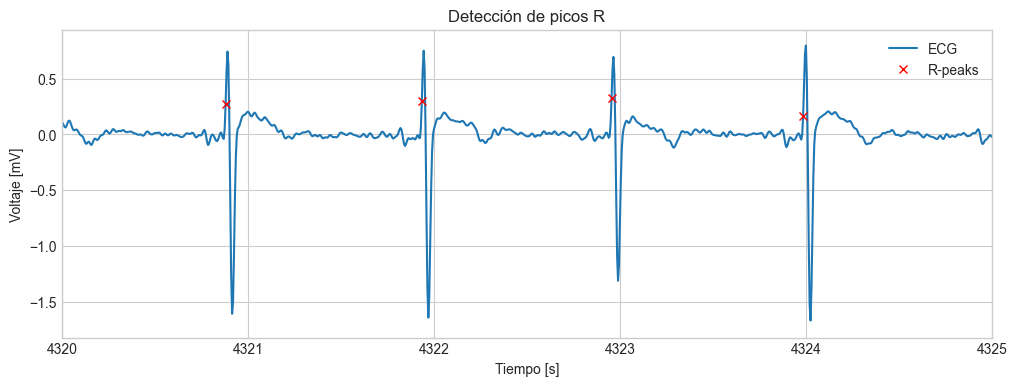

In [14]:
# %%Filtrado ECG
# -------- 1) Notch 50 Hz --------
def notch_50hz(x,fs=FS, f0=50.0, q=40.0):
    w0 = f0 / (fs / 2.0)  # frecuencia normalizada
    b, a = iirnotch(w0, q)
    return filtfilt(b, a, x) #filtrado bidireccional para eliminar defasaje

# -------- 2) Band-pass 0.5–35 Hz (Butterworth 4°, fase cero) --------
def bandpass_butter(x,fs=FS, lowcut=0.5, highcut=35.0, order=4):
    nyq = fs / 2
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='bandpass', output='sos')
    return sosfiltfilt(sos, x)

# -------- 3) Baseline por mediana --------
def baseline_median(x, fs=FS, win_ms=300):

    win = int(round(win_ms * fs / 1000.0))
    if win % 2 == 0:
        win += 1  # ventana impar
    pad = win // 2
    xpad = np.pad(x, (pad, pad), mode='reflect')
    baseline = np.zeros_like(x)
    for i in range(len(x)):
        baseline[i] = np.median(xpad[i:i+win])
    return x - baseline

def filtro_ecg (ecg):
    ecg=notch_50hz(ecg)
    ecg=bandpass_butter(ecg)
    #ecg=baseline_median(ecg)
    return ecg
# %% Lectura  + Graficos ECG y latidos
def leer_archivo(path, start, stop):
    #Lectura de archivos
    start = round(start * 12000)
    stop = round(stop * 12000)
    raw = np.fromfile('data/' + path, dtype=np.int16)
    gain = 25
    baseline = 26

    ecg_mV = (raw - baseline) / gain
    
    t = np.arange(len(ecg_mV)) / FS
    
    ecg_mV= filtro_ecg(ecg_mV)
    
    return ecg_mV[start:stop],t[start:stop]
    

def graficar_archivo(ecg_mV, t, name):
    #Graficos ECG
    plt.figure(figsize=(12, 4))
    plt.plot(t, ecg_mV, linewidth=1)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [mV]")
    plt.title(f"ECG ({name})")
    plt.grid(True)
    plt.show()
    return

# %% Deteccion de latidos

def detect_rpeaks(ecg,t):
    # Filtrado para QRS
    b, a = butter(2, F_QRS, btype='band', fs=FS) # filtro digital tipo butter pasabanda en rango de frecuencia del complejo QRS de orden 2
    ecg = filtfilt(b, a, ecg) #filtrado bidereccional

    # Altura mínima relativa y distancia mínima entre picos
    # Distancia mínima según HR máxima permitida
    min_dist = int(FS * 60.0 / MAX_HR) #distancia que tendrian los latidos si hr=220 lat/min

    # Altura mínima: percentil relativo --> umbral adaptativo
    med = np.median(ecg) #promedio robusto
    mad = np.median(np.abs(ecg - med)) # MAD = Median Absolute Deviation --> a cada elemento le resto la media y calculo la media del modulo de resta
    k=4 # define un umbral minimo de altura
    
    h = med + k * 1.4826 * mad   # 1.4826: factor que convierte la MAD en una desviacion estandar (distribucion gaussiana)
    #mediana + 4 veces el estimador de desviacion estandar
    
    peaks, _ = find_peaks(ecg, distance=min_dist, height=h)

    # Filtrar picos demasiado cercanos según HR fisiológico
    rr = np.diff(peaks) / FS
    rr_ok = (rr > 60.0/MAX_HR) & (rr < 60.0/MIN_HR)
    keep = np.insert(rr_ok, 0, True)
    peaks = peaks[keep]

    return peaks



def prueba_latidos(ecg,t, peaks):
    #Funcion para comprobar la deteccion de latidos graficamente
    
    plt.figure(figsize=(12,4))
    plt.plot(t, ecg, label='ECG')
    plt.plot(t[peaks], ecg[peaks], 'r x', label='R-peaks')
    plt.xlim(4320,4325)
    plt.legend(); plt.xlabel('Tiempo [s]'); plt.ylabel('Voltaje [mV]')
    plt.title('Detección de picos R')
    plt.show()
    
    return


files = [file for file in listdir('data')]
paciente1 = files[6]
ecg, t = leer_archivo(paciente1, 70.017, 74.017)
latidos = detect_rpeaks(ecg,t)
prueba_latidos(ecg,t, latidos)

A partir de la detección de los latidos, se procedió a la construcción de los intervalos RR y al cálculo del ritmo cardíaco. 

Posteriormente, para eliminar fluctuaciones no estacionarias de orden superior en la frecuencia cardíaca que podrían enmascarar las oscilaciones de baja frecuencia, la serie temporal se des-tendenció utilizando un polinomio de cuarto grado ajustado por mínimos cuadrados.



Pico en banda 0.01–0.10 Hz: 0.0883 Hz (potencia relativa=572)


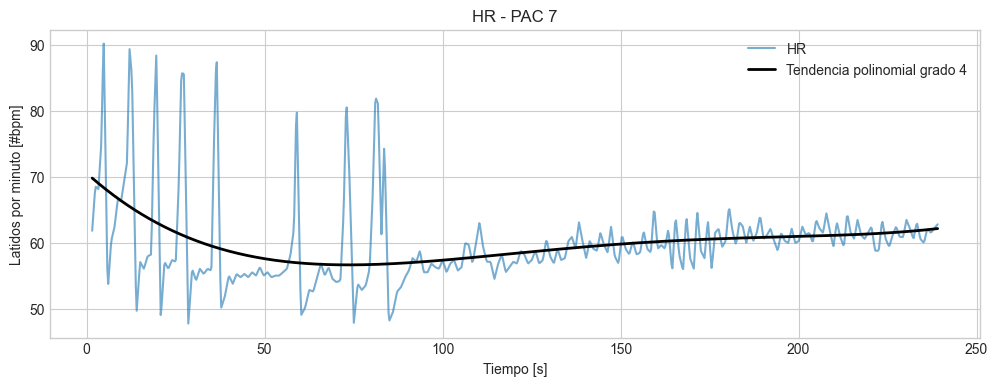

In [15]:
def const_RR (latidos):
    
    t_r = latidos / FS  # tiempos de ocurrencia de cada latido (s)
    rr = np.diff(t_r)   # en segundos --> np.diff resta el actual con el anterior == armo los intervalor RR
    
    good = (rr >= RR_MIN) & (rr <= rr_max) #compruebo eliminar valores absurdos

    rr_clean = rr[good]
    t = t_r[1:][good]   # tiempos asociados a cada RR
    
    hr = 60/rr_clean # frecuencia cardiaca  

#### INTERPOLACION
    
    t0 = t[0]
    t1 = t[-1] # ultimo elemento del array
    t_u = np.arange(t0, t1, 1.0/FS_hr)   # eje de tiempo uniforme
    
    # Interpolación lineal (suele ser suficiente para HRV lenta)
    f = interp1d(t, hr, kind='linear', fill_value='extrapolate', bounds_error=False)
    hr_u = f(t_u)   # HR(t) uniforme, en bpm
    
    # Ajuste polinomial de grado 4 (paper) sobre HR_u vs t_u
    p = np.polyfit(t_u, hr_u, deg=4)
    trend = np.polyval(p, t_u)
    
    hr_detr = hr_u - trend   # señal de HR sin tendencia (bpm)

    N = len(hr_detr)
    
    # Ventana rectangular (implícita); FFT de una sola cara
    HR = np.fft.rfft(hr_detr, n=N)
    freqs = np.fft.rfftfreq(N, d=1.0/FS_hr)
    
    # PSD no normalizada (proporcional)
    PSD = (np.abs(HR)**2) / N
    
    # Recorte de banda 0.01–0.10 Hz
    f_lo, f_hi = 0.01, 0.10
    band = (freqs >= f_lo) & (freqs <= f_hi) #array de booleanos
    freq_band = freqs[band]
    psd_band  = PSD[band]
    
    # Pico espectral dentro de 0.01–0.10 Hz
    if np.any(band):
        kmax = np.argmax(psd_band)
        f_peak = freq_band[kmax]
        p_peak = psd_band[kmax]
    else:
        f_peak = np.nan
        p_peak = np.nan
    
    print(f"Pico en banda 0.01–0.10 Hz: {f_peak:.4f} Hz (potencia relativa={p_peak:.3g})")
    return hr_detr, hr_u, t_u, trend

def grafico_hr_det(t_u, hr_u, trend, name):
    
    hr_detr = hr_u - trend 
    
    
    # HR(t) cruda vs detrendida
    plt.figure(figsize=(12,4))
    plt.plot(t_u, hr_u, label='HR', alpha=0.6)
    #plt.plot(t_u, hr_detr, label='HR sin tendencia (bpm)', color='r')
    plt.plot(t_u, trend, label='Tendencia polinomial grado 4', color='k', lw=2)
    plt.xlabel('Tiempo [s]'); plt.ylabel('Latidos por minuto [#bpm]'); plt.title(f'HR - {name}')
    plt.legend(); plt.grid(True); plt.show()  
    return


hr_d, hr_u, t_u, trend = const_RR(latidos)
grafico_hr_det(t_u, hr_u, trend, "PAC 7")

Una vez obtenido el ritmo cardiaco, se busca obtener el espectro preictal y postictal. Para ello se calcula la transformada rápida de Fourier con una ventana rectangular (de igual manera que en el paper), pero también se obtiene mediante el método de Welch, con el objetivo de realizar un análisis más preciso. Ambos métodos se grafican para su posterior comparación.

In [16]:
def transformada_rapida(x, name):
    X = fft(x)    
    PDS = np.abs(X)**2
    
    N= len(x)
    df= df = FS_hr / N #resolucion espectral = [[1/(s*muestras)]
    
    
    Ff=np.arange(N)*df #mi eje x en hz
    
    Ff = Ff[:N//2]
    PDS = (np.abs(X)**2) / (N * FS_hr)
    PDS = PDS[:N//2]
    
    return Ff, PDS

# %% PSD POR WELCH
def welch_psd(x, name="PSD WELCH",
              seg_len_sec=60,        # 60–120 s va bien para 0.03–0.1 Hz
              overlap=0.5,           # 50% de solapamiento
              detrend_already_done=True):
    """
    Calcula PSD con Welch usando ventana de Hann PERIÓDICA (sym=False),
    adecuada para análisis espectral con FFT.
    
    ecg_uniform: señal ya remuestreada a fs (muestras uniformes)
    fs: frecuencia de muestreo [Hz]
    """
    
    n = len(x)
    
    #control de error
    if n < 4:
        raise ValueError("La señal es demasiado corta.")
        

    # --- nperseg desde segundos (clave para baja frecuencia) ---
    nperseg = int(seg_len_sec * FS_hr)
    # Asegurar límites razonables
    nperseg = max(64, min(nperseg, n))  # al menos 64 muestras y no más que n
    
    # --- ventana Hann PERIÓDICA ---
    win = windows.hann(nperseg, sym=False)  # sym=False -> versión periódica (mejor para FFT/Welch)

    # --- solapamiento ---
    noverlap = int(nperseg * overlap)
    
    # --- nfft (potencia de 2 >= nperseg, útil para eficiencia y resolución) ---
    

    def next_pow2(x):
        return 2 ** math.ceil(math.log2(max(1, int(x))))
    nfft = max(nperseg, next_pow2(nperseg)) #si nperseg no es potencia de 2, entonces nfft se sube a la siguiente potencia de 2.

    # --- Welch ---
    f, Pxx = welch(x,#senal
                   fs=FS_hr, #frecuencia de muestreo
                   window=win, 
                   nperseg=nperseg,
                   noverlap=noverlap,
                   nfft=nfft,
                   return_onesided=True,
                   average= 'mean', #promedio robusto
                   scaling='density')  # PSD en unidades/Hz

    return f, Pxx

ecg_pre,t_pre= leer_archivo(paciente1, 62.033, 66.033)
latidos_pre_01= detect_rpeaks(ecg_pre,t_pre)
hr_pre_01, tr_pre_01, _ , _= const_RR(latidos_pre_01)
Ff_pre,PSD_pre= transformada_rapida(hr_pre_01, "PRE ICTAL")
f_hr_pre_01,pxx_pre_01= welch_psd(hr_pre_01, "PRE ICTAL")
    
ecg_post, t_post= leer_archivo(paciente1, 70.017, 74.017)
latidos_post_01= detect_rpeaks(ecg_post,t_post)
hr_post_01, tr_01,  _ , _ = const_RR(latidos_post_01)
Ff_post_01,PSD_post_01= transformada_rapida(hr_post_01, "POST ICTAL")
f_hr_post_01,pxx_post_01= welch_psd(hr_post_01, "POST ICTAL")


Pico en banda 0.01–0.10 Hz: 0.0294 Hz (potencia relativa=103)
Pico en banda 0.01–0.10 Hz: 0.0883 Hz (potencia relativa=572)


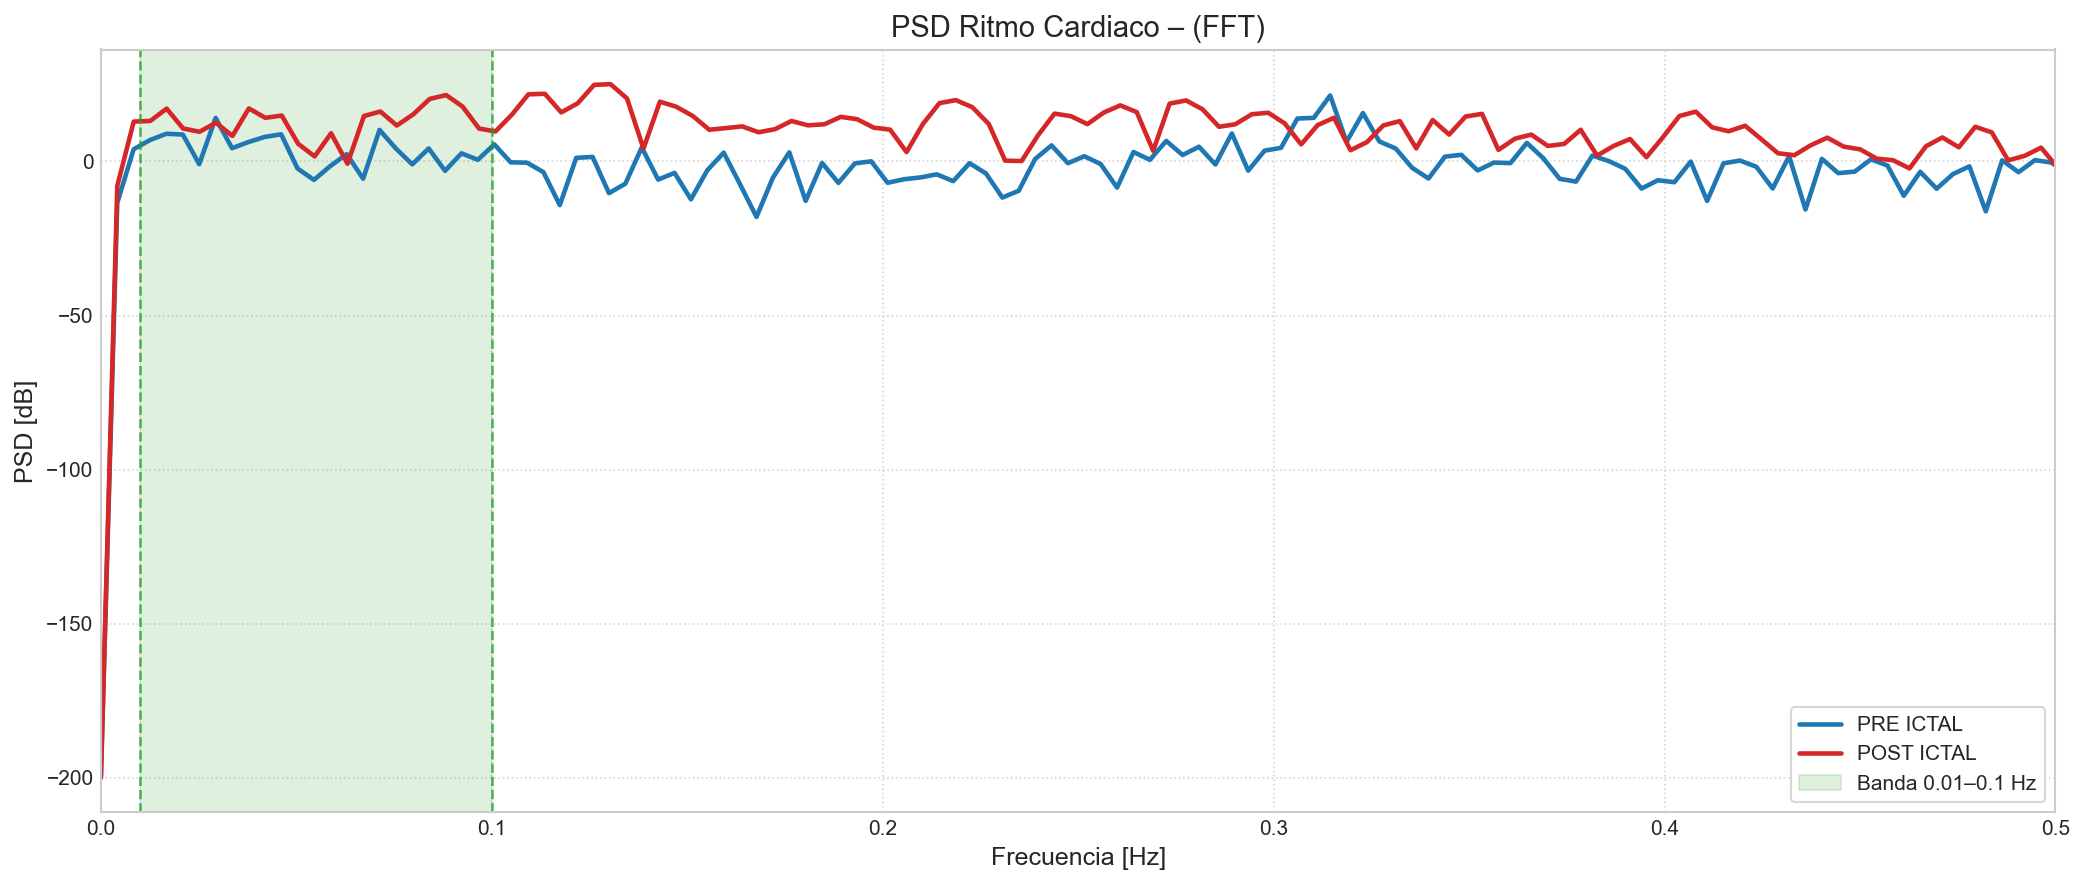

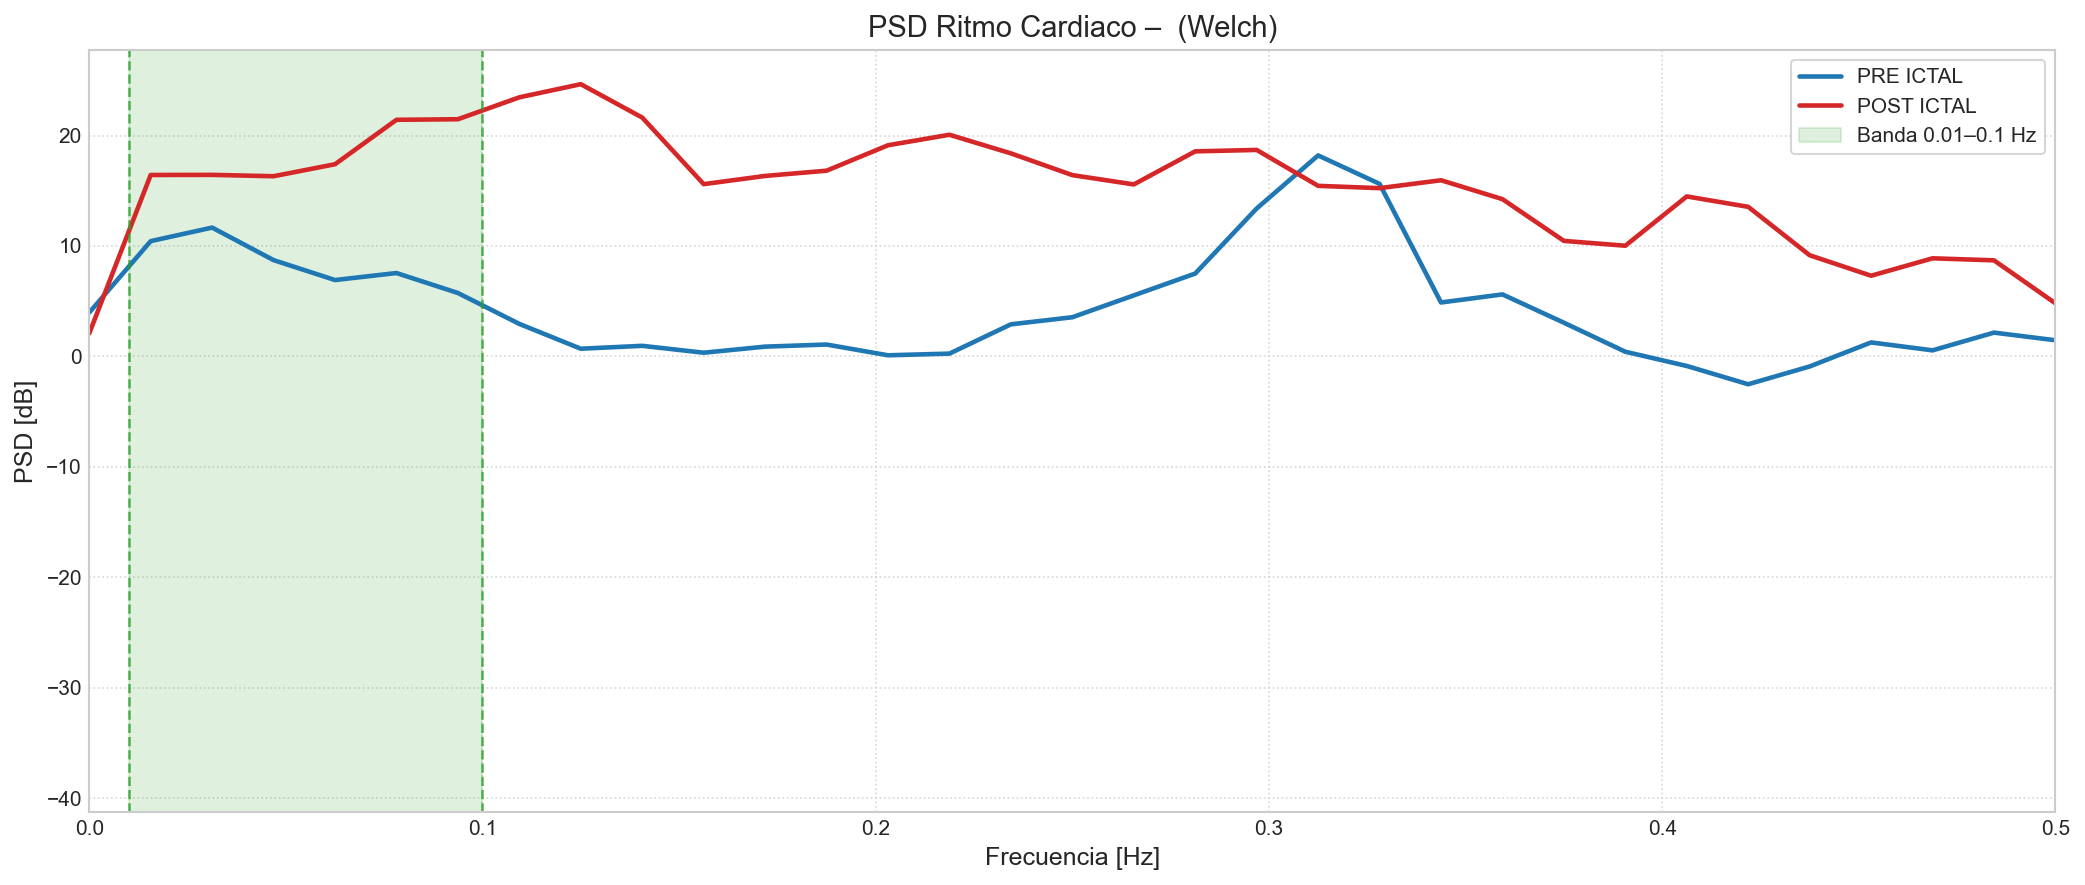

In [17]:
def presentacion_datos(
    f_pre, pxx_pre, 
    f_post, pxx_post, 
    name="PSD HR",
    xlim=(0,0.5),
    banda=(0.01, 0.1),          # banda a resaltar [Hz]
    dpi=150
):

    eps = 1e-20  # estabilidad numérica para log10

    # Estilo base
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(14, 6), dpi=dpi)

    # Curvas PSD en dB
    ax.plot(f_pre, 10*np.log10(pxx_pre + eps), 
            label="PRE ICTAL", 
            color="#1f77b4", linewidth=2.2)
    ax.plot(f_post, 10*np.log10(pxx_post + eps), 
            label="POST ICTAL", 
            color="#d62728", linewidth=2.2)

    # Sombreado de banda
    f_lo, f_hi = banda
    banda_color = "#2ca02c"
    ax.axvspan(f_lo, f_hi, color=banda_color, alpha=0.15, label=f"Banda {f_lo}–{f_hi} Hz")

    # Línea/guías opcionales en los bordes de la banda (estético)
    ax.axvline(f_lo, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)
    ax.axvline(f_hi, color=banda_color, linestyle="--", linewidth=1.2, alpha=0.8)

    # Etiquetas y título
    ax.set_xlabel("Frecuencia [Hz]", fontsize=12)
    ax.set_ylabel("PSD [dB]", fontsize=12)
    ax.set_title(f"PSD Ritmo Cardiaco – {name}", fontsize=14)

    if xlim is not None:
        ax.set_xlim(*xlim)

    # Leyenda y cuadricula
    ax.legend(loc="best", frameon=True)
    ax.grid(True, which="both", linestyle=":", linewidth=0.8, alpha=0.8)

    # Ajuste de márgenes
    plt.tight_layout()


    plt.show()

    return 

presentacion_datos(Ff_pre,PSD_pre,Ff_post_01,PSD_post_01, "(FFT)")
presentacion_datos(f_hr_pre_01,pxx_pre_01,f_hr_post_01,pxx_post_01, " (Welch)")
    
